<h2>Angewandte Künstliche Intelligenz (<b>Pandas</b>)</h2>

<table>
    <tr>
        <th>Matrikelnummer</th>
        <th>Name</th>
    </tr>
    <tr>
        <td>762476</td>
        <td>Simon Heiß</td>
    </tr>
</table>

<h4>Aufgaben:</h4>

In [1]:
#1. Pandas importieren.
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
#2. Die CSV Datei „Banken.csv“ herunterladen (Moodle) und einlesen.
banks = pd.read_csv("banken.csv")
banks

,alter,beruf,familienstand,bildungsstand,default,saldo,immobilien,gehalt,kontaktart,tag,monat,dauer,kampagne,btage,vorzugehorigkeit,bausgabe,y
0,30,unemployed,verheiratet,primaer,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,verheiratet,sekundaer,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,ledig,tertiaer,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,verheiratet,tertiaer,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,verheiratet,sekundaer,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,verheiratet,sekundaer,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,verheiratet,tertiaer,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,verheiratet,sekundaer,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,verheiratet,sekundaer,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [34]:
#3. Die ersten 5 Rows anzeigen lassen
headFive = banks.head(5)
headFive

,alter,beruf,familienstand,bildungsstand,default,saldo,immobilien,gehalt,kontaktart,tag,monat,dauer,kampagne,btage,vorzugehorigkeit,bausgabe,y
0,30,unemployed,verheiratet,primaer,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,verheiratet,sekundaer,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,ledig,tertiaer,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,verheiratet,tertiaer,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,verheiratet,sekundaer,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
#4. Durchschnittsalter (mean) aller Bankkunden ermitteln.
banks["alter"].mean()

41.17009511170095

In [5]:
#5. Wie ist der Familienstand der jüngsten Person im Datensatz?
# Alternative zu Aufgabe 5: banks["familienstand"][banks["alter"].min()]
print(banks[banks.alter == banks.alter.min()].familienstand)


503     ledig
1900    ledig
2780    ledig
3233    ledig
Name: familienstand, dtype: object


In [6]:
#6. Wie viele einzigartige Jobkategorien gibt es im Datensatz?
print("Amount of jop categories: " + str(len(banks["beruf"].unique()))) #Wieviele
print(banks["beruf"].unique())#Welche


Amount of jop categories: 12
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']


            beruf  count
0          admin.    478
1     blue-collar    946
2    entrepreneur    168
3       housemaid    112
4      management    969
5         retired    230
6   self-employed    183
7        services    417
8         student     84
9      technician    768
10     unemployed    128
11        unknown     38


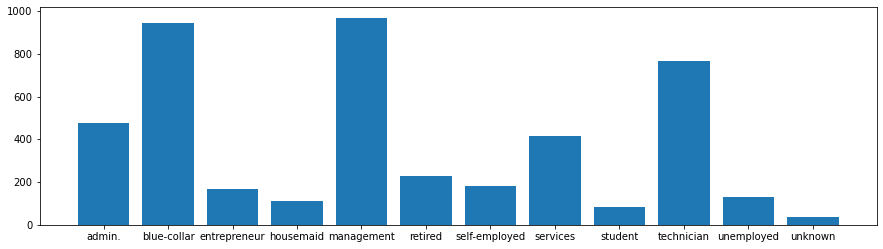

In [7]:
#7. Wie viele Personen gibt es pro Berufsgruppe?
data = banks.groupby("beruf")["beruf"].count().reset_index(name="count")
print(data)
plt.figure().set_figwidth(15)
plt.bar(data["beruf"], data["count"])
plt.show()

In [8]:
#8. Es gibt eine Spalte mit der Bezeichnung „default". Verwenden Sie die .map() -funktion von Pandas, 
#um eine neue Spalte mit dem Namen „defaultcode" zu erstellen, die eine 0 enthält, 
#falls es keinen Standard gab, oder eine 1, wenn es einen Standard gab.

# Alternative zu Aufgabe 8: banks["defaultcode"] = banks.default.map({"no": 0, "yes": 1})
banks["defaultcode"] = banks["default"].map(lambda x: 1 if x == "yes" else 0)
print(banks["default"].tail(5))
print(banks["defaultcode"].tail(5))

4516     no
4517    yes
4518     no
4519     no
4520     no
Name: default, dtype: object
4516    0
4517    1
4518    0
4519    0
4520    0
Name: defaultcode, dtype: int64


In [43]:
#9. Was ist das häufigste Bildungsniveau für arbeitslose Menschen (laut Datensatz)?
GroupedAndCounted = banks[banks["beruf"] == "unemployed"].groupby("bildungsstand")["bildungsstand"].count().reset_index(name="count")
GroupedAndCounted[GroupedAndCounted["count"] == GroupedAndCounted["count"].max()]


,bildungsstand,count
1,sekundaer,68


average age of unemployed people: 40.90625


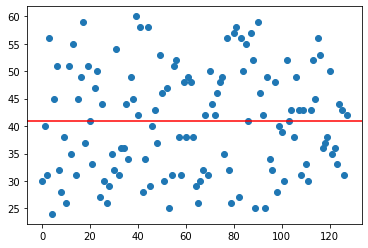

In [70]:
#10. Was ist das Durchschnittsalter für Arbeitslosigkeit im Datensatz?
unemployed = banks[banks["beruf"] == "unemployed"]["alter"].reset_index()
unemployedMean = banks[banks["beruf"] == "unemployed"]["alter"].mean()
print("average age of unemployed people:",unemployedMean)
#//////////////////////////////////////////////////////////
plt.scatter(unemployed.index, unemployed["alter"])
plt.axhline(y=unemployedMean, color="red")
plt.show()

